In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
#IMPORTING THE DATA FROM CSV FILE INTO DATAFRAME
df = pd.read_csv("after_titanic.csv")
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,55.00,C85,C,Adult
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S,Adult
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.86,E46,S,Adult
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.70,G6,S,Child
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.55,D35,S,Adult
199,872,873,0,1,"Carlsson, Mr. Frans Olof",male,33,0,0,695,15.00,B51 B53 B55,S,Adult
200,879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,55.00,C50,C,Adult
201,887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S,Adult


In [ ]:
# d1 = df.iloc[:, [0,1,2,4,5,9,10]] #Dimensionality Reduction (Data Reduction technique)
d1
# df.iloc[0:3,0:4]
# d2 = df.iloc[:, [0,1,2,9,10,]]
# d1
# d2

,Unnamed: 0,PassengerId,Survived,Name,Sex,Ticket,Fare
0,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,55.00
1,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.10
2,6,7,0,"McCarthy, Mr. Timothy J",male,17463,51.86
3,10,11,1,"Sandstrom, Miss. Marguerite Rut",female,PP 9549,16.70
4,11,12,1,"Bonnell, Miss. Elizabeth",female,113783,26.55
...,...,...,...,...,...,...,...
198,871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,11751,52.55
199,872,873,0,"Carlsson, Mr. Frans Olof",male,695,15.00
200,879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,11767,55.00
201,887,888,1,"Graham, Miss. Margaret Edith",female,112053,30.00


**Min-Max Normalization (Refer from ETL PDF for theory)**
<br>
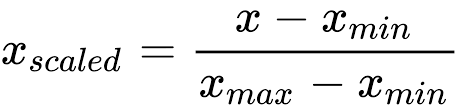

In [ ]:
df1 = df.iloc[:, [0,1,2,9,6,10]].copy()  #Dimensionality Reduction (Data Reduction technique)

#Min-Max Normalization using SKLEARN
scaler = MinMaxScaler()

df1["Age_norm"] = scaler.fit_transform(df[["Age"]])
df1["Fare_norm"] = scaler.fit_transform(df[["Fare"]])
df1

,Unnamed: 0,PassengerId,Survived,Ticket,Age,Fare,Age_norm,Fare_norm
0,1,2,1,PC 17599,38,55.00,0.468354,1.000000
1,3,4,1,113803,35,53.10,0.430380,0.957342
2,6,7,0,17463,54,51.86,0.670886,0.929502
3,10,11,1,PP 9549,4,16.70,0.037975,0.140099
4,11,12,1,113783,58,26.55,0.721519,0.361248
...,...,...,...,...,...,...,...,...
198,871,872,1,11751,47,52.55,0.582278,0.944993
199,872,873,0,695,33,15.00,0.405063,0.101931
200,879,880,1,11767,56,55.00,0.696203,1.000000
201,887,888,1,112053,19,30.00,0.227848,0.438707


In [ ]:
#Min-Max Normalization using Numpy only
df2 = df.iloc[:, [0,1,2,9,6,10]].copy()  #
age = df2["Age"].values
df2["Age_norm"] = (age - np.min(age)) / (np.max(age) - np.min(age))
df2

,Unnamed: 0,PassengerId,Survived,Ticket,Age,Fare,Age_norm
0,1,2,1,PC 17599,38,55.00,0.468354
1,3,4,1,113803,35,53.10,0.430380
2,6,7,0,17463,54,51.86,0.670886
3,10,11,1,PP 9549,4,16.70,0.037975
4,11,12,1,113783,58,26.55,0.721519
...,...,...,...,...,...,...,...
198,871,872,1,11751,47,52.55,0.582278
199,872,873,0,695,33,15.00,0.405063
200,879,880,1,11767,56,55.00,0.696203
201,887,888,1,112053,19,30.00,0.227848


Normalization using RobustScaler
<br>
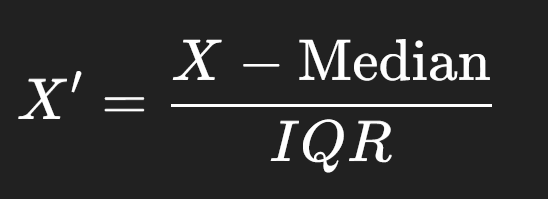

In [ ]:
#Normalization using RobustScaler
df3 = df.iloc[:, [0,1,2,9,6,10]].copy()  #
scaler = RobustScaler()
df3[["Age_norm", "Fare_norm"]] = scaler.fit_transform(df3[["Age", "Fare"]])
df3

,Unnamed: 0,PassengerId,Survived,Ticket,Age,Fare,Age_norm,Fare_norm
0,1,2,1,PC 17599,38,55.00,0.186047,0.000000
1,3,4,1,113803,35,53.10,0.046512,-0.073658
2,6,7,0,17463,54,51.86,0.930233,-0.121729
3,10,11,1,PP 9549,4,16.70,-1.395349,-1.484784
4,11,12,1,113783,58,26.55,1.116279,-1.102927
...,...,...,...,...,...,...,...,...
198,871,872,1,11751,47,52.55,0.604651,-0.094980
199,872,873,0,695,33,15.00,-0.046512,-1.550688
200,879,880,1,11767,56,55.00,1.023256,0.000000
201,887,888,1,112053,19,30.00,-0.697674,-0.969180
